In [8]:
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit import Chem
from rdkit.Chem import ChemicalFeatures
from rdkit import RDConfig
import requests
from collections import defaultdict
from IPython.display import SVG

In [2]:
# grab a feature definition file from the RDKit's contrib dir in github:
res = requests.get('https://raw.githubusercontent.com/rdkit/rdkit/master/Contrib/M_Kossner/BaseFeatures_DIP2_NoMicrospecies.fdef')
fdef = res.text
ffact = ChemicalFeatures.BuildFeatureFactoryFromString(fdef)

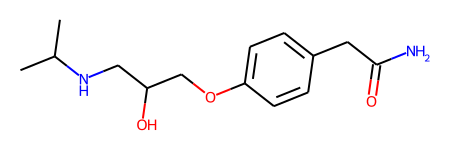

In [4]:

atenolol = Chem.MolFromSmiles('CC(C)NCC(O)COc1ccc(CC(N)=O)cc1')
atenolol

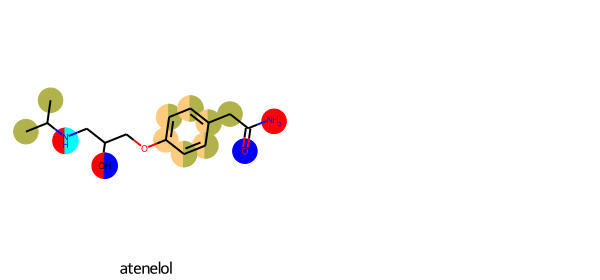

In [15]:

feats = ffact.GetFeaturesForMol(atenolol)
colors = {'SingleAtomDonor':(1,0,0),
          'SingleAtomAcceptor':(0,0,1),
          'BasicGroup':(0,1,1),
          'Arom6':(1,0.8,0.5),
          'Hphobe':(0.7,0.7,0.3)}
atomHighlights = defaultdict(list)
highlightRads = {}
for feat in feats:
    if feat.GetType() in colors:
        clr = colors[feat.GetType()]
        for aid in feat.GetAtomIds():
            atomHighlights[aid].append(clr)
            highlightRads[aid] = 0.8

d2d = rdMolDraw2D.MolDraw2DSVG(600,280,300,280)
d2d.DrawMoleculeWithHighlights(atenolol,"atenelol",dict(atomHighlights),{},highlightRads,{})
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

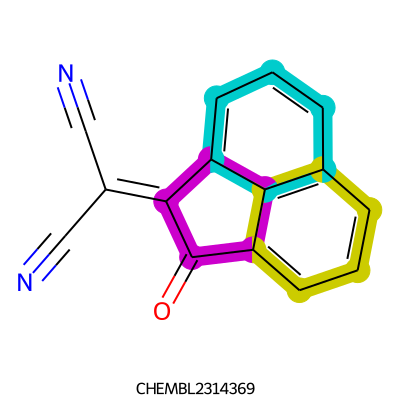

In [17]:
chembl2314369=Chem.MolFromSmiles('N#CC(C#N)=C1C(=O)c2cccc3cccc1c23')
rings = chembl2314369.GetRingInfo()

colors = [(0.8,0.0,0.8),(0.8,0.8,0),(0,0.8,0.8),(0,0,0.8)]

athighlights = defaultdict(list)
arads = {}
for i,rng in enumerate(rings.AtomRings()):
    for aid in rng:
        athighlights[aid].append(colors[i])
        arads[aid] = 0.3

bndhighlights = defaultdict(list)
for i,rng in enumerate(rings.BondRings()):
    for bid in rng:
        bndhighlights[bid].append(colors[i])
    
d2d = rdMolDraw2D.MolDraw2DSVG(400,400)
d2d.DrawMoleculeWithHighlights(chembl2314369,'CHEMBL2314369',dict(athighlights),dict(bndhighlights),arads,{})
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

In [27]:
svg = SVG(d2d.GetDrawingText())